# POLYNOMAIL REGRESSION ON "MPG" DATASET

## Importing libraries and loading the dataset

In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

df = sns.load_dataset("mpg")

In [154]:
# Understanding the dataset
df.head()
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu

In [138]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

# Data Cleaning and Pre-processing

In [139]:
## Handling missing values
df = df.dropna()
print("Missing values after cleaning:\n",df.isnull().sum())

Missing values after cleaning:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [140]:
# Detecting and removing the outliers
Q1 = df["mpg"].quantile(0.25)
Q3 = df["mpg"].quantile(0.75)

IQR = Q3-Q1
df = df[(df["mpg"]>= Q1-1.5*IQR) & (df["mpg"]<= Q3+1.5*IQR)]

# Shape after the outlier removal
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (392, 9)


In [141]:
# Encoding the categorical variables
df = pd.get_dummies(df, drop_first=True)

# Converts categorical variable to 0/1


# Feature Engineering

In [142]:
# Create new features to help the model learn better
df["weight_hp_ratio"]=df['weight']/df['horsepower']

In [143]:
# Define the features and target
x = df[["horsepower","weight"]]
y = df["mpg"]

## Feature Scaling


In [144]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


## Polynomial Feature Transormation

In [145]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_scaled)


In [146]:
# Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [147]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the Model


In [148]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.6883062442194614
Mean Squared Error: 15.909031087262859


## Visualizing

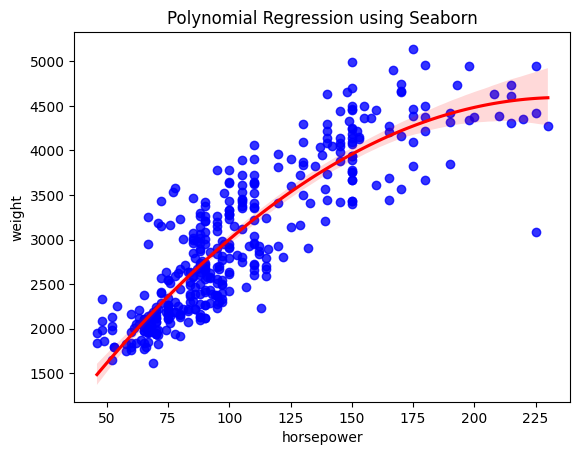

In [150]:
sns.regplot(x='horsepower', y='weight', data=df, order=2, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Polynomial Regression using Seaborn")
plt.show()


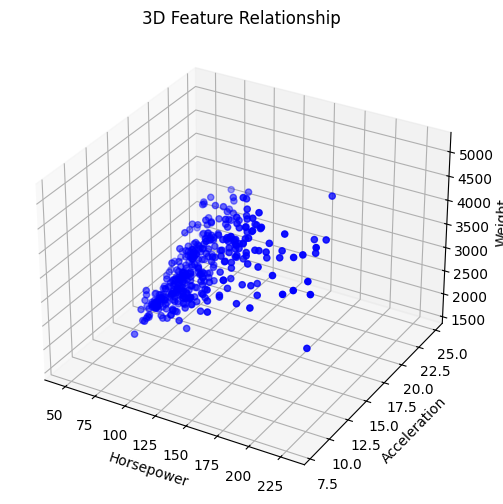

In [151]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['horsepower'], df['acceleration'], df['weight'], color='blue')
ax.set_xlabel("Horsepower")
ax.set_ylabel("Acceleration")
ax.set_zlabel("Weight")
plt.title("3D Feature Relationship")
plt.show()
